In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [5]:
def col_to_cat(training_data):
    training_data_copy = training_data.copy()
    for column in training_data_copy:
        if training_data_copy[column].dtype == object:
            integer = 0
            for unique_col in training_data_copy[column].unique():
                integer += 1
                training_data_copy.loc[training_data_copy[column] == unique_col , column] = float(integer)
        else:
            pass
    return training_data_copy

In [18]:
def train_model(dataset, learning_rate = 0.1, epochs = 2000, verbose = 0):
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=25)
    train_data, val_data = train_test_split(train_data, test_size = 0.2, random_state = 25)
    
    train_data = col_to_cat(train_data)
    test_data = col_to_cat(test_data)
    val_data = col_to_cat(val_data)
    
    X_train, Y_train = train_data.drop('SalePrice', axis = 1).fillna(0), train_data['SalePrice'].to_numpy('float32')
    X_test, Y_test = test_data.drop('SalePrice', axis = 1).fillna(0), test_data['SalePrice'].to_numpy('float32')
    X_val, Y_val = val_data.drop('SalePrice', axis = 1).fillna(0), val_data['SalePrice'].to_numpy('float32')
    
    
    model = tf.keras.Sequential([
        layers.Normalization(input_shape = (X_train.shape[1],), axis = -1),
        layers.Dense(units=10, activation = 'relu'),
        layers.Dense(units=1)])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate), 
                  loss=tf.keras.metrics.mean_squared_error)

    time1 = time.time()
    history = model.fit(X_train, Y_train, 
                        epochs = epochs, 
                        verbose=verbose,
                        validation_data=(X_val, Y_val))

    plt.figure(figsize = (10,10))
    plt.title('learning rate = ' + str(learning_rate) + ' : Final Value - ' + "{:e}".format(history.history['loss'][0]))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    
    time2 = time.time()
    print(time2-time1)
    
    return history.history['loss'][0],history.history['loss'][-1]

In [19]:
first_obj, last_obj = train_model(features_selected_dataset, learning_rate = 0.01, epochs = 100, verbose = 0)
print( "{:e}".format(first_obj),"{:e}".format(last_obj), "{:e}".format(last_obj- first_obj))

4.834061861038208
3.500393e+10 2.084370e+09 -3.291956e+10


# Insufficient data
These parameters lack enough data or have too many np.nan entries in order to be modeled.

In [218]:
total_dataset_nnull.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [219]:
total_dataset_nnull = total_dataset_nnull.drop(['Id', 'Alley', 'Utilities', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold'], axis = 1)

## Conditional probabilities
Some parameters are conditioned on others. It might be worth exploring models that are explicitly build for conditional probabilities in the input space. Because of conditioning tree based algorithms might be a good option in general.

In [220]:
#total_dataset_nnull.drop(['Condition2', 'Exterior2nd'], axis = 1)

In [221]:
training_data, testing_data = train_test_split(total_dataset_nnull, test_size=0.2, random_state=25)

In [223]:
training_data_new, training_data_old = col_to_cat(training_data)

In [224]:
testing_data_new, testing_data_old = col_to_cat(testing_data)

In [225]:
X_train, Y_train = training_data_new.drop('SalePrice', axis = 1), training_data_new['SalePrice']
X_test, Y_test = testing_data_new.drop('SalePrice', axis = 1), testing_data_new['SalePrice']
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train.fillna(0))
X_test = scaler.fit_transform(X_test.fillna(0))

In [226]:
X_train

array([[0.41176471, 0.        , 0.26198083, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.25      , 0.23961661, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.20766773, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58823529, 0.25      , 0.13099042, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.25      , 0.28753994, ..., 0.        , 0.        ,
        0.        ],
       [0.35294118, 0.25      , 0.2715655 , ..., 0.        , 0.        ,
        0.        ]])

In [272]:
regression =  Ridge(max_iter = 1000, 
                    solver = 'saga')
regression.fit(X_train, Y_train)
no_pca = regression.score(X_test, Y_test)
no_pca

0.16481029066484254

In [292]:
def pca_linear(n_comp):
    pca = PCA(n_components=n_comp, svd_solver = 'full')
    principalComponents = pca.fit_transform(X_train)
    train_X_PCA = pd.DataFrame(data = principalComponents)

    pca = PCA(n_components=train_X_PCA.shape[1], svd_solver = 'full')
    principalComponents = pca.fit_transform(X_test)
    test_X_PCA = pd.DataFrame(data = principalComponents)

    regression = Ridge(max_iter = 1000, solver = 'saga')
    regression.fit(train_X_PCA, Y_train)
    
    #Y_pred = regression.predict(test_X_PCA)
    #np.sum((Y_pred-Y_test)**2)/len(Y_test)
    return regression.score(test_X_PCA, Y_test), np.sum((Y_test - Y_pred)**2)/len(Y_pred)


In [293]:
pca_linear('mle')

(-2.083330477628443, 3.35454383027511e+32)

In [275]:
scores = [pca_linear(n_comp) for n_comp in range(1,40)]

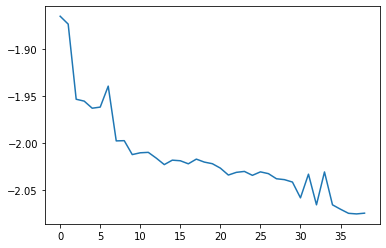

In [276]:
plt.plot(np.array(scores).T[0])

In [243]:
n_comp = 15
pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(X_train)
train_X_PCA = pd.DataFrame(data = principalComponents)

pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(X_test)
test_X_PCA = pd.DataFrame(data = principalComponents)

In [244]:
modelPCA = tf.keras.Sequential([
    layers.Normalization(input_shape= [n_comp,], axis=-1),
    layers.Dense(units=1)])

modelPCA.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 15)               31        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 47
Trainable params: 16
Non-trainable params: 31
_________________________________________________________________


In [264]:
modelPCA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.5), 
              loss=tf.keras.metrics.mean_squared_error)

In [265]:
history_n = modelPCA.fit(train_X_PCA,
    Y_train,
    epochs=1000,
    verbose=1)

Epoch 1/1000
37/37 [==============================] - 0s 889us/step - loss: 1420950016.0000
Epoch 2/1000
37/37 [==============================] - 0s 917us/step - loss: 1420942976.0000
Epoch 3/1000
37/37 [==============================] - 0s 861us/step - loss: 1420942848.0000
Epoch 4/1000
37/37 [==============================] - 0s 833us/step - loss: 1420945664.0000
Epoch 5/1000
37/37 [==============================] - 0s 834us/step - loss: 1420943360.0000
Epoch 6/1000
37/37 [==============================] - 0s 833us/step - loss: 1420944768.0000
Epoch 7/1000
37/37 [==============================] - 0s 917us/step - loss: 1420945664.0000
Epoch 8/1000
37/37 [==============================] - 0s 917us/step - loss: 1420938752.0000
Epoch 9/1000
37/37 [==============================] - 0s 861us/step - loss: 1420950272.0000
Epoch 10/1000
37/37 [==============================] - 0s 972us/step - loss: 1420946176.0000
Epoch 11/1000
37/37 [==============================] - 0s 861us/step - loss: 14

37/37 [==============================] - 0s 750us/step - loss: 1420940288.0000
Epoch 177/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941184.0000
Epoch 178/1000
37/37 [==============================] - 0s 833us/step - loss: 1420941696.0000
Epoch 179/1000
37/37 [==============================] - 0s 806us/step - loss: 1420940416.0000
Epoch 180/1000
37/37 [==============================] - 0s 861us/step - loss: 1420938368.0000
Epoch 181/1000
37/37 [==============================] - 0s 861us/step - loss: 1420941056.0000
Epoch 182/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941184.0000
Epoch 183/1000
37/37 [==============================] - 0s 806us/step - loss: 1420942848.0000
Epoch 184/1000
37/37 [==============================] - 0s 778us/step - loss: 1420937344.0000
Epoch 185/1000
37/37 [==============================] - 0s 806us/step - loss: 1420941440.0000
Epoch 186/1000
37/37 [==============================] - 0s 722us/step - los

37/37 [==============================] - 0s 1ms/step - loss: 1420944768.0000
Epoch 351/1000
37/37 [==============================] - 0s 917us/step - loss: 1420934784.0000
Epoch 352/1000
37/37 [==============================] - 0s 833us/step - loss: 1420942848.0000
Epoch 353/1000
37/37 [==============================] - 0s 861us/step - loss: 1420938496.0000
Epoch 354/1000
37/37 [==============================] - 0s 889us/step - loss: 1420936320.0000
Epoch 355/1000
37/37 [==============================] - 0s 806us/step - loss: 1420938496.0000
Epoch 356/1000
37/37 [==============================] - 0s 778us/step - loss: 1420947328.0000
Epoch 357/1000
37/37 [==============================] - 0s 750us/step - loss: 1420939136.0000
Epoch 358/1000
37/37 [==============================] - 0s 806us/step - loss: 1420940416.0000
Epoch 359/1000
37/37 [==============================] - 0s 806us/step - loss: 1420938368.0000
Epoch 360/1000
37/37 [==============================] - 0s 833us/step - loss:

37/37 [==============================] - 0s 778us/step - loss: 1420935680.0000
Epoch 525/1000
37/37 [==============================] - 0s 722us/step - loss: 1420938240.0000
Epoch 526/1000
37/37 [==============================] - 0s 722us/step - loss: 1420936960.0000
Epoch 527/1000
37/37 [==============================] - 0s 750us/step - loss: 1420935552.0000
Epoch 528/1000
37/37 [==============================] - 0s 722us/step - loss: 1420939136.0000
Epoch 529/1000
37/37 [==============================] - 0s 750us/step - loss: 1420939264.0000
Epoch 530/1000
37/37 [==============================] - 0s 722us/step - loss: 1420932608.0000
Epoch 531/1000
37/37 [==============================] - 0s 695us/step - loss: 1420941952.0000
Epoch 532/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933376.0000
Epoch 533/1000
37/37 [==============================] - 0s 722us/step - loss: 1420934784.0000
Epoch 534/1000
37/37 [==============================] - 0s 806us/step - los

37/37 [==============================] - 0s 750us/step - loss: 1420934400.0000
Epoch 699/1000
37/37 [==============================] - 0s 750us/step - loss: 1420936704.0000
Epoch 700/1000
37/37 [==============================] - 0s 695us/step - loss: 1420937472.0000
Epoch 701/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933888.0000
Epoch 702/1000
37/37 [==============================] - 0s 722us/step - loss: 1420933632.0000
Epoch 703/1000
37/37 [==============================] - 0s 750us/step - loss: 1420933760.0000
Epoch 704/1000
37/37 [==============================] - 0s 695us/step - loss: 1420936704.0000
Epoch 705/1000
37/37 [==============================] - 0s 778us/step - loss: 1420945536.0000
Epoch 706/1000
37/37 [==============================] - 0s 722us/step - loss: 1420935040.0000
Epoch 707/1000
37/37 [==============================] - 0s 806us/step - loss: 1420937216.0000
Epoch 708/1000
37/37 [==============================] - 0s 750us/step - los

37/37 [==============================] - 0s 1ms/step - loss: 1420938368.0000
Epoch 873/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420932224.0000
Epoch 874/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420943104.0000
Epoch 875/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420931968.0000
Epoch 876/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420947200.0000
Epoch 877/1000
37/37 [==============================] - 0s 972us/step - loss: 1420937728.0000
Epoch 878/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420938112.0000
Epoch 879/1000
37/37 [==============================] - 0s 2ms/step - loss: 1420944896.0000
Epoch 880/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420937472.0000
Epoch 881/1000
37/37 [==============================] - 0s 1ms/step - loss: 1420933632.0000
Epoch 882/1000
37/37 [==============================] - 0s 972us/step - loss: 1420934528.0000

In [266]:
plt.plot(history.history['loss'])

In [32]:
import xgboost as xgb

In [33]:
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)

In [34]:
xg_reg = xgb.XGBRegressor()

In [35]:
xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [37]:
preds = xg_reg.predict(X_test)

In [38]:
np.sum((np.array(Y_test) - preds)**2)/len(preds)

3865930201.870016

In [39]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001E526E39700>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

C:\Users\sboyukliyski\AppData\Local\Temp\ipykernel_11796\492925393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15, 5))


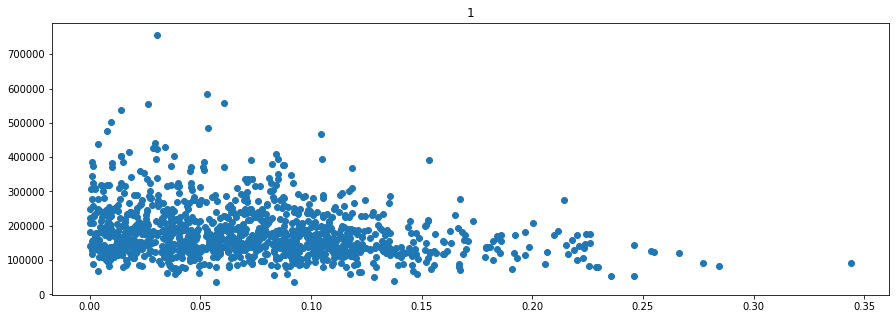

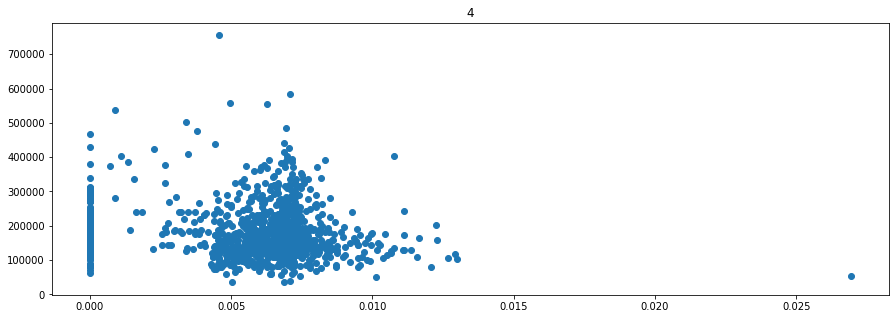

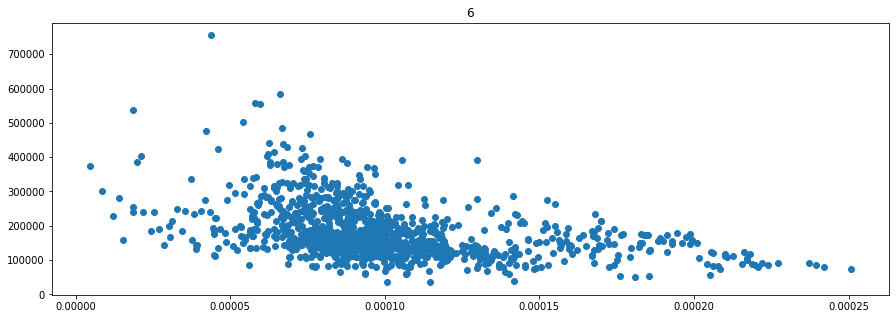

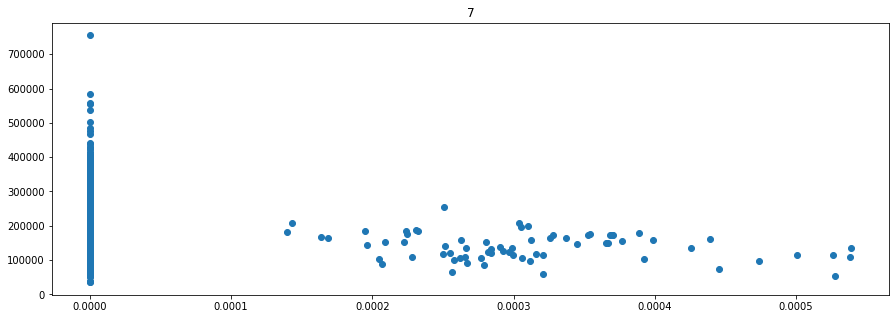

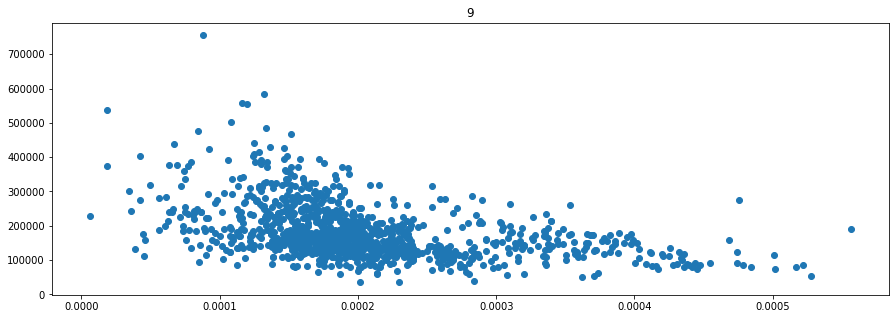

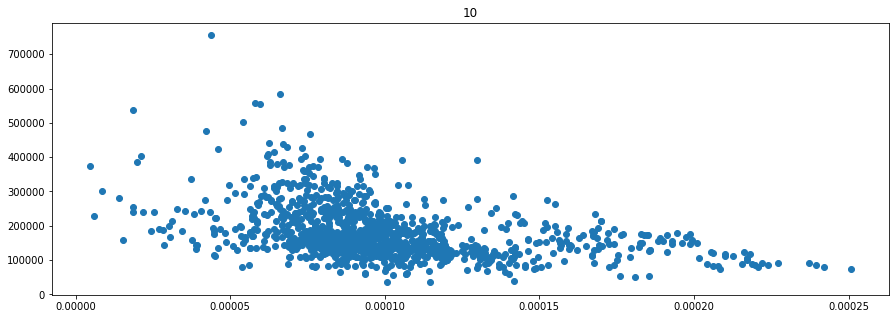

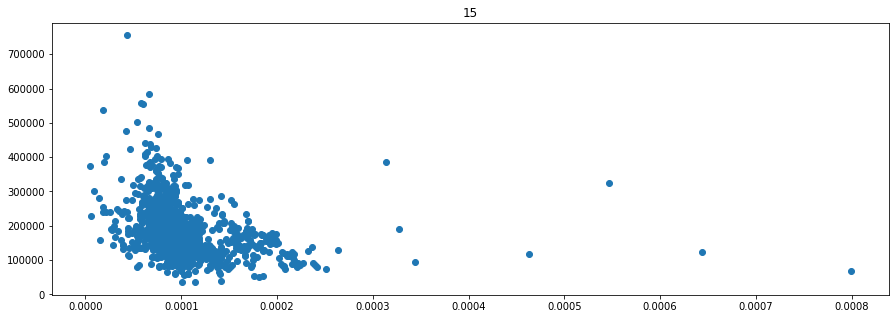

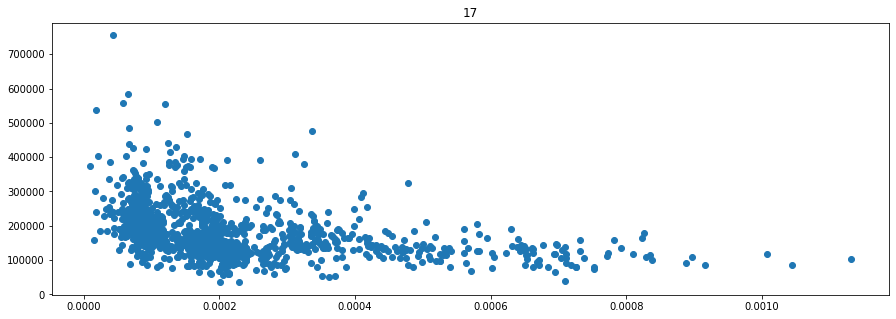

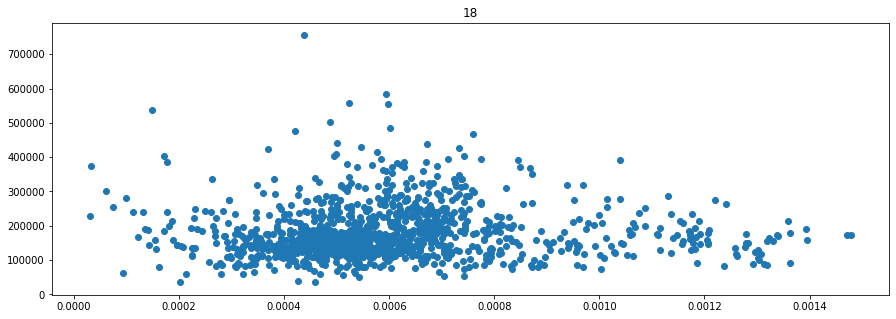

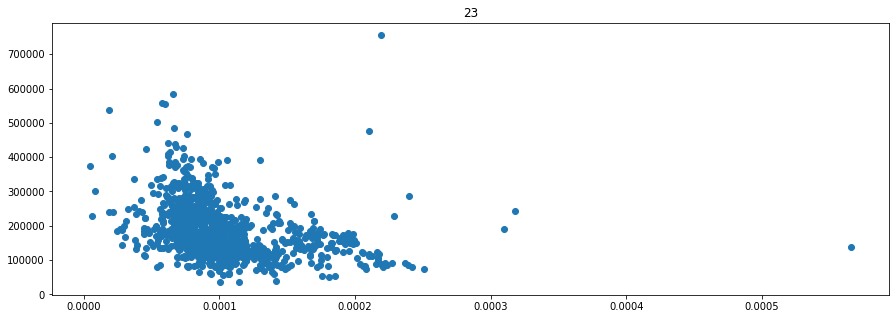

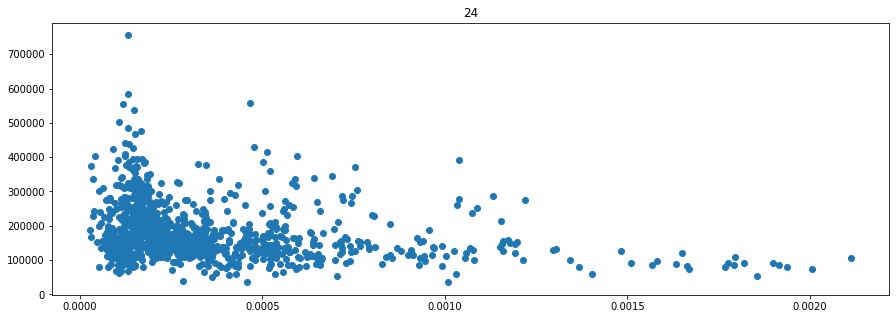

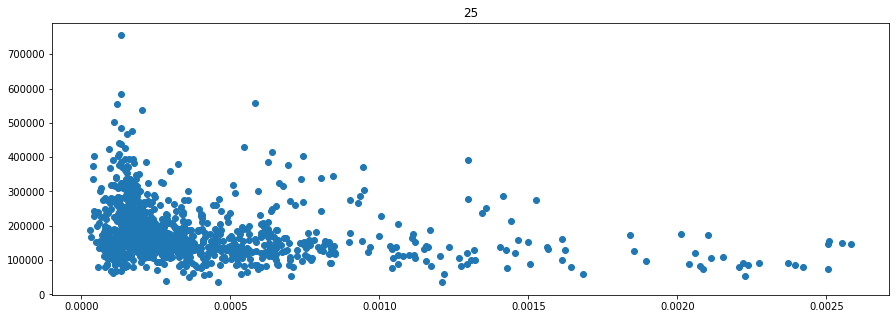

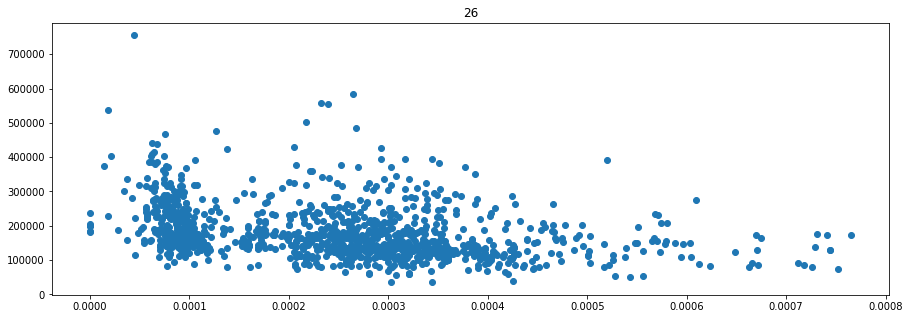

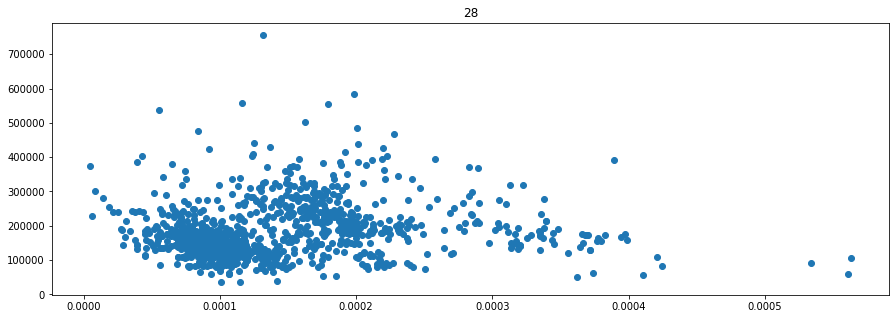

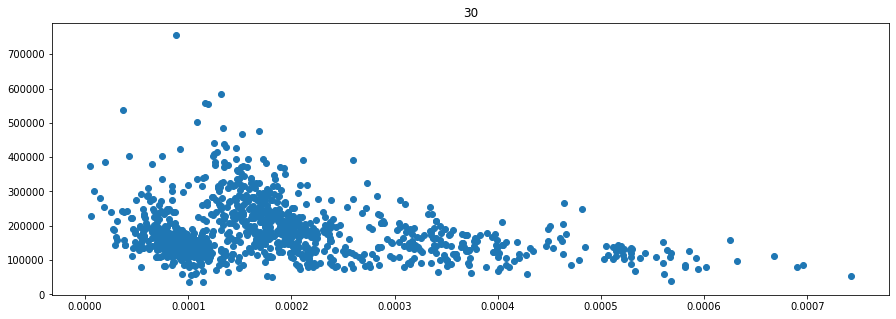

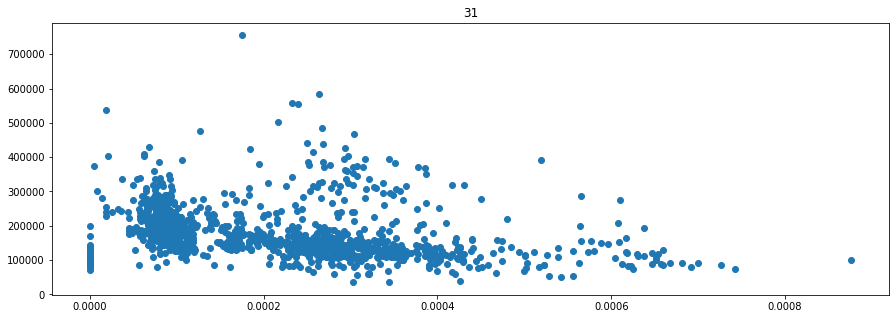

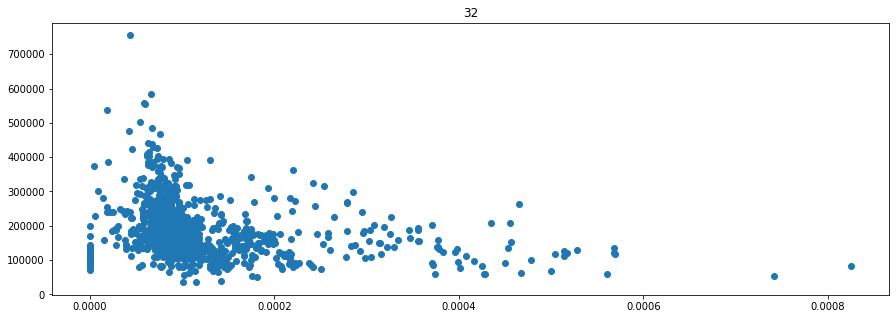

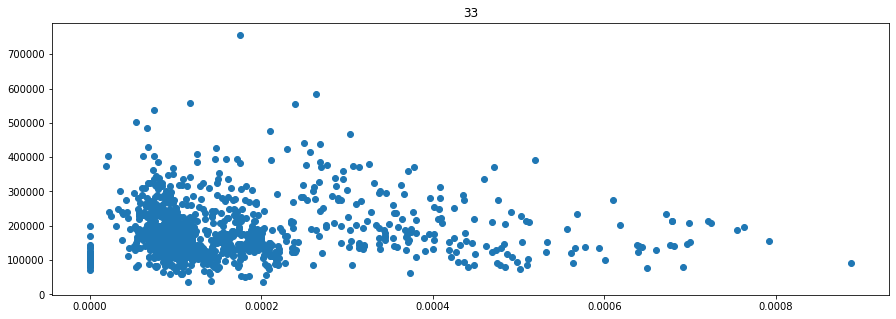

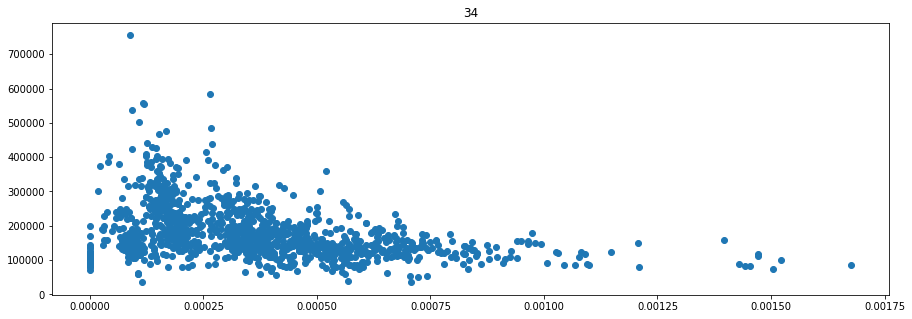

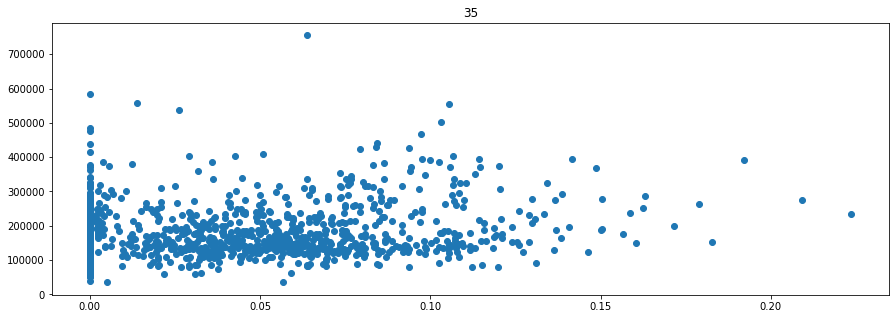

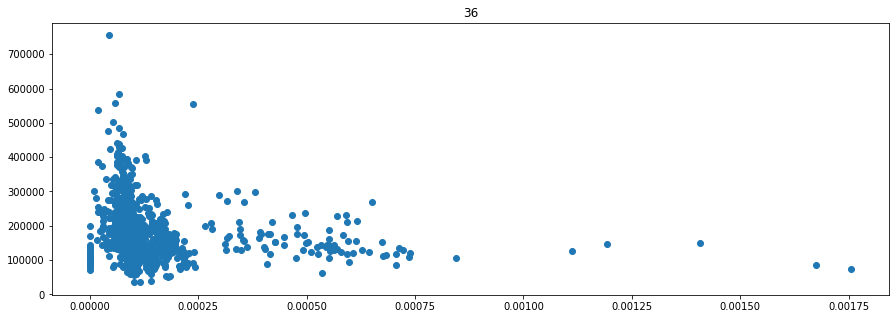

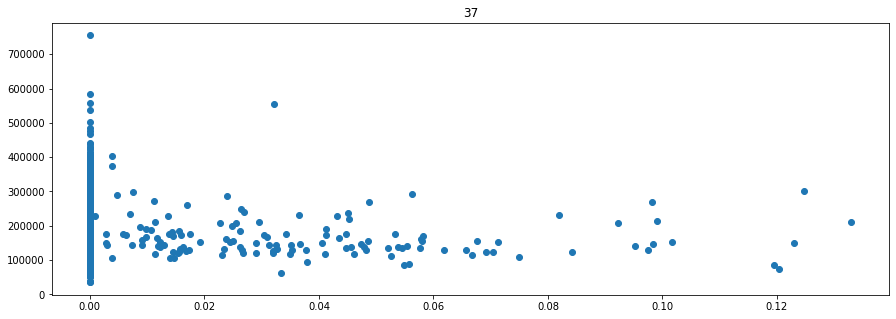

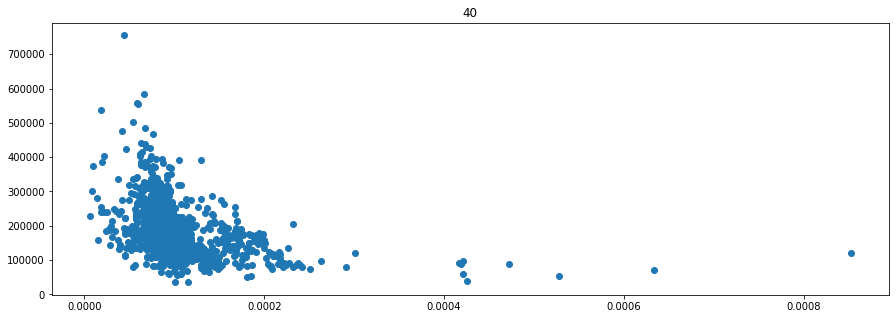

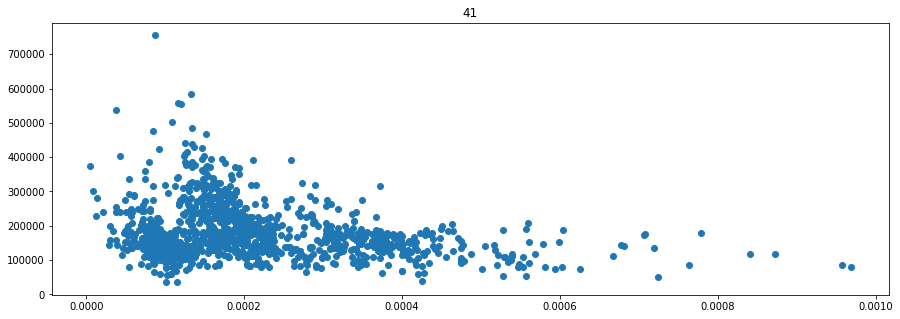

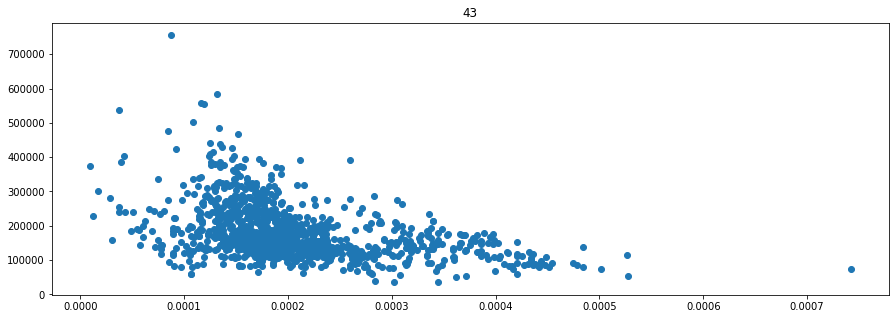

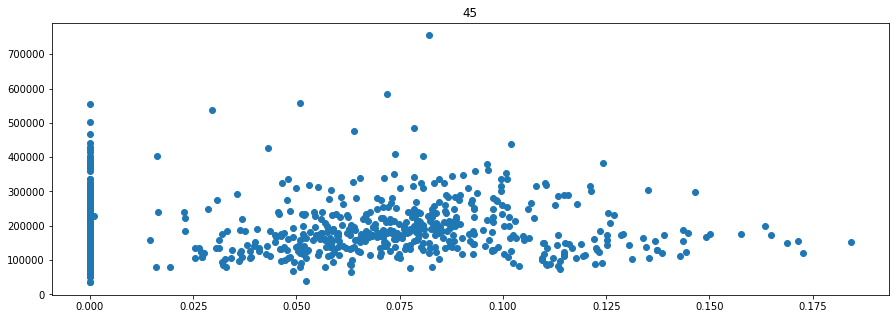

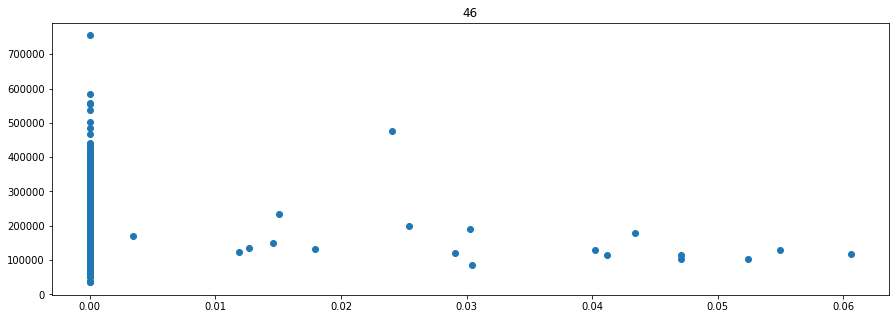

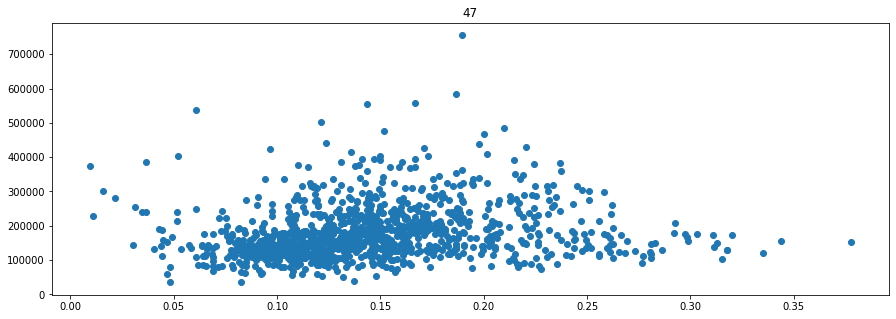

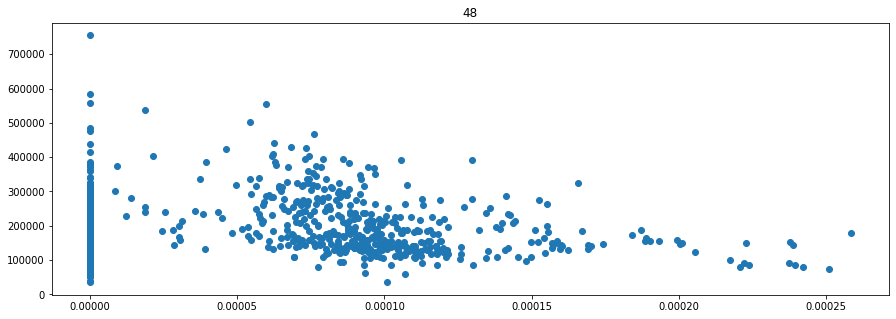

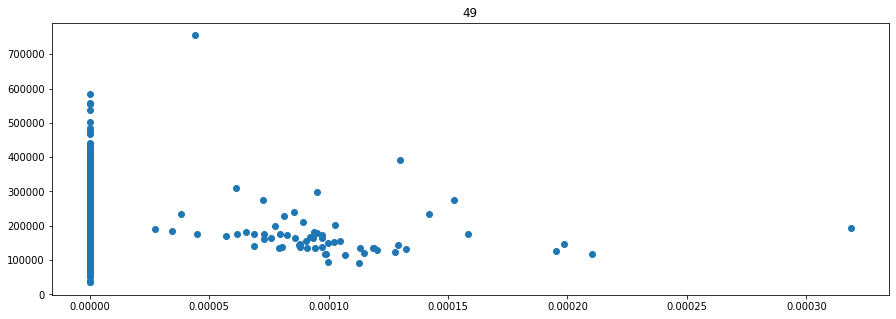

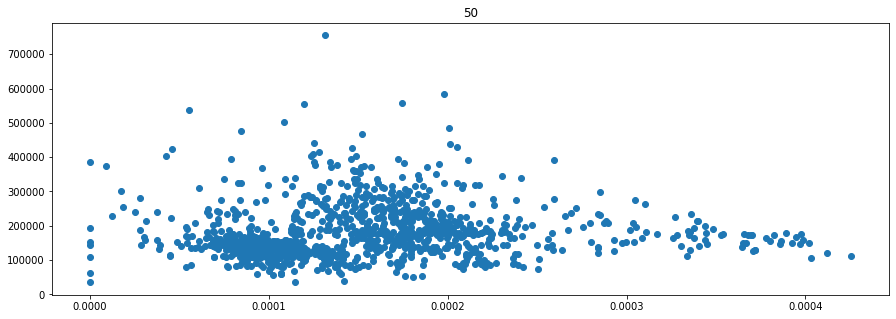

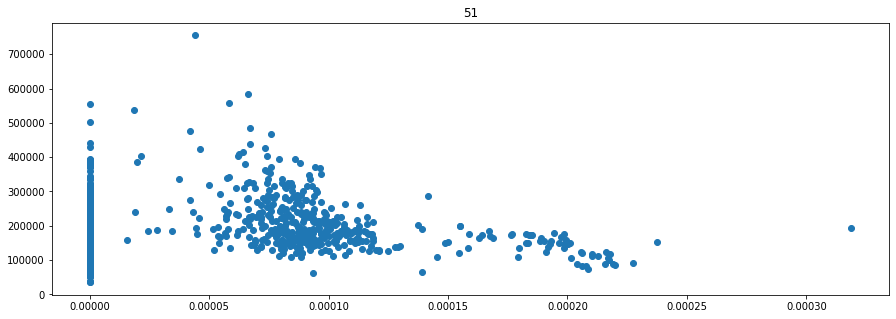

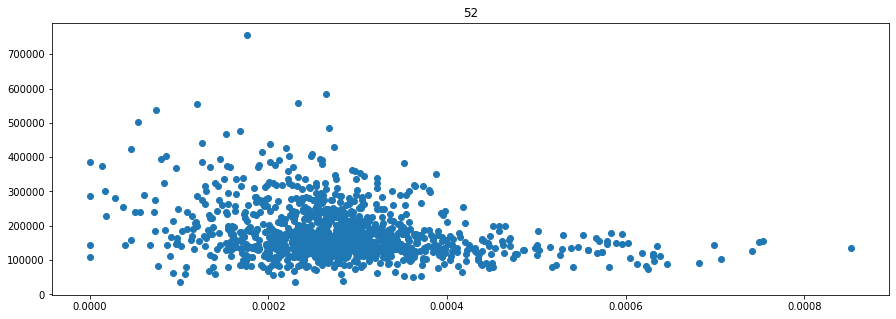

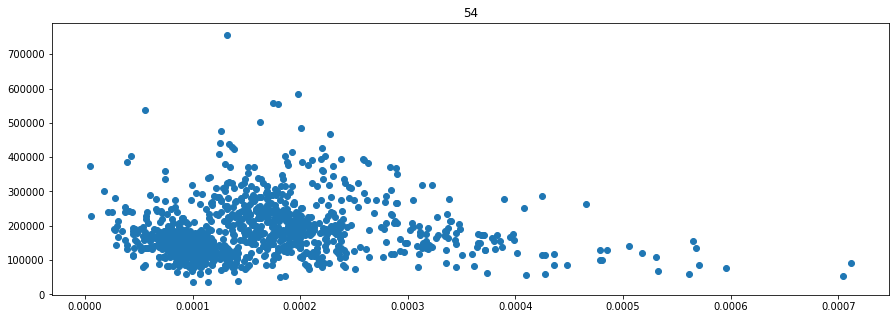

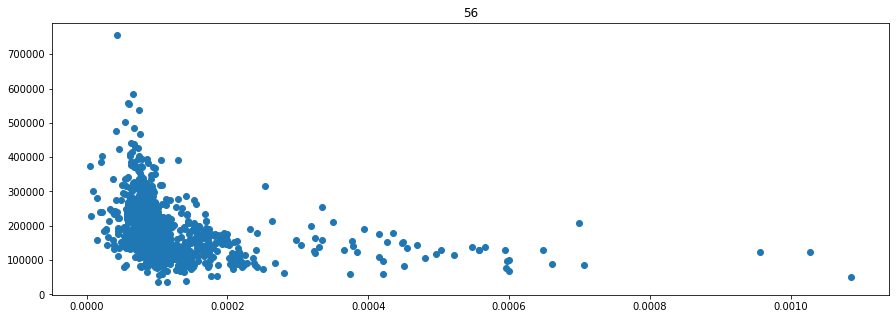

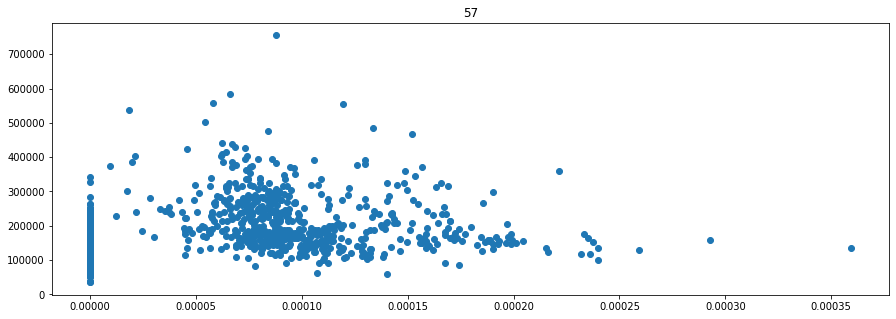

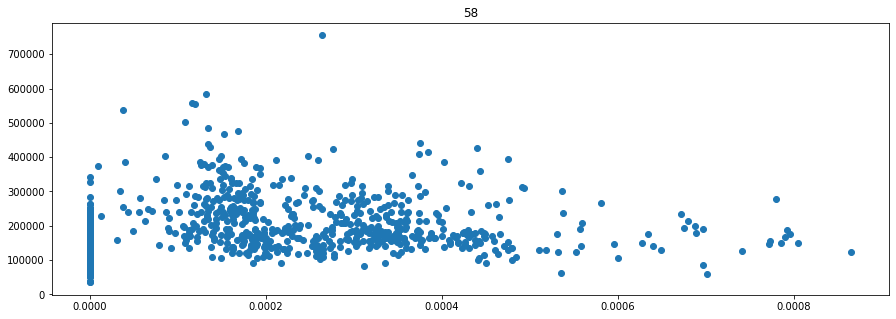

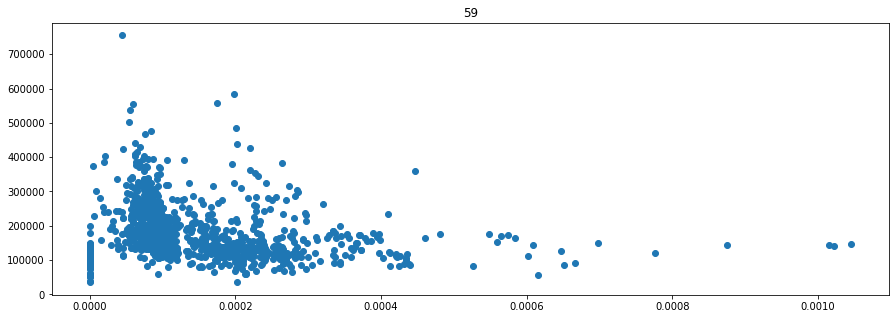

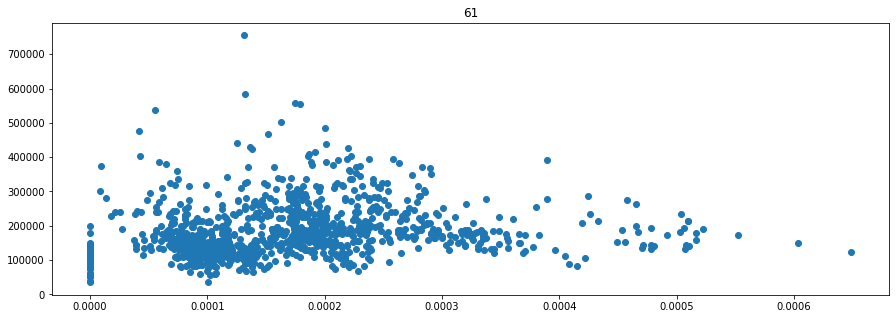

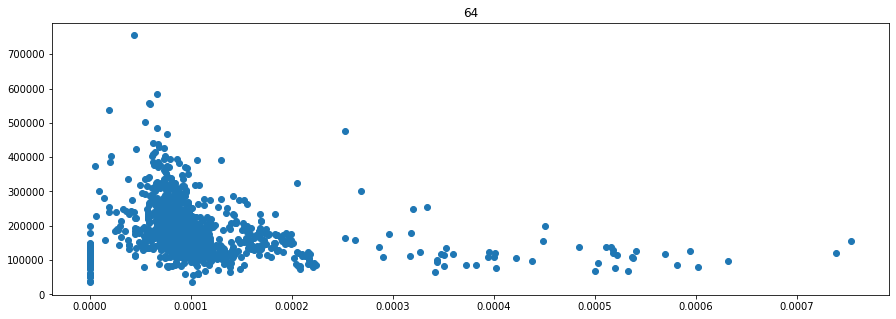

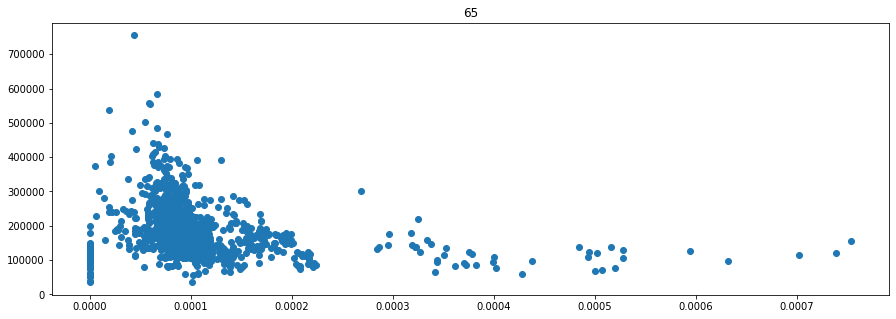

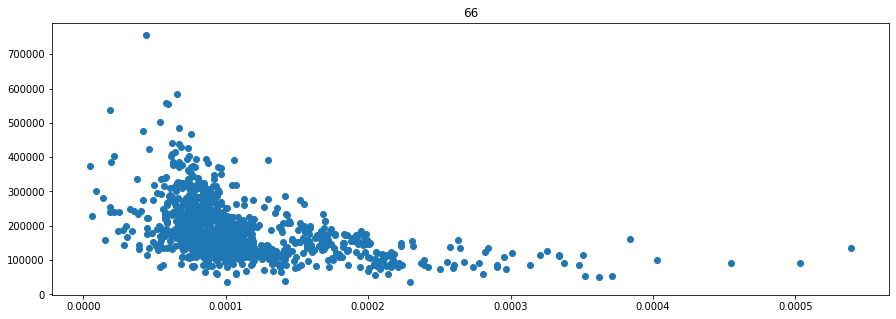

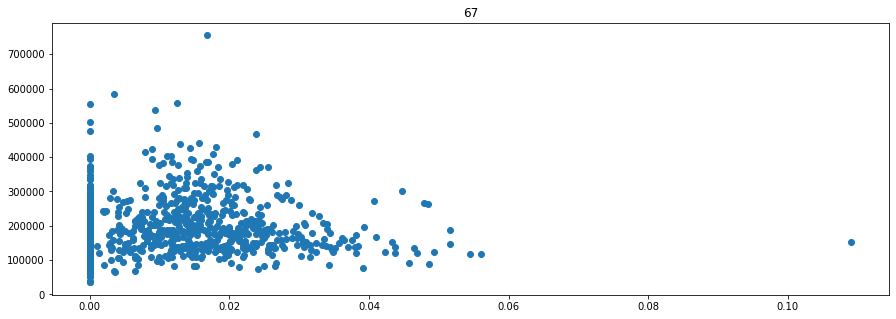

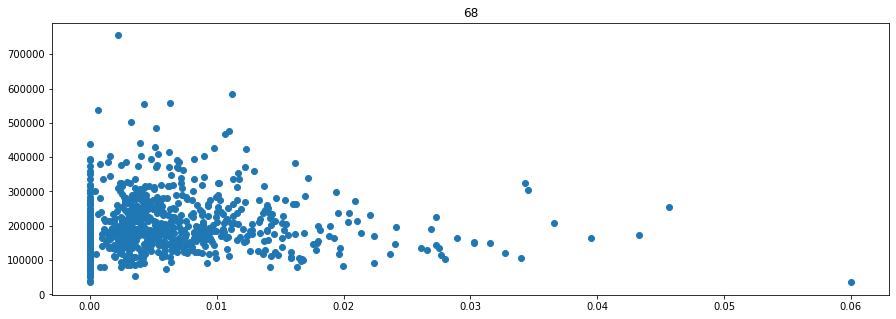

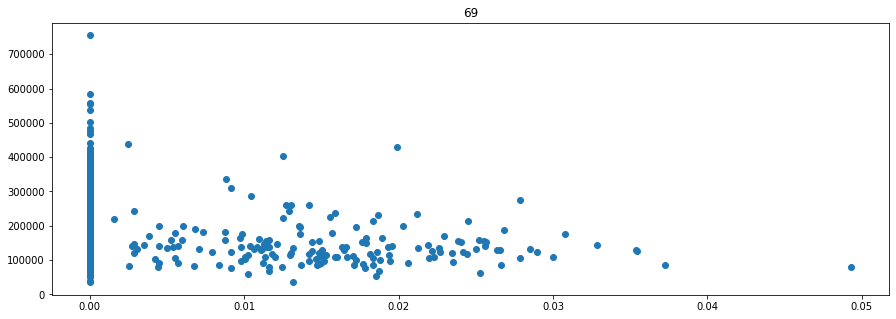

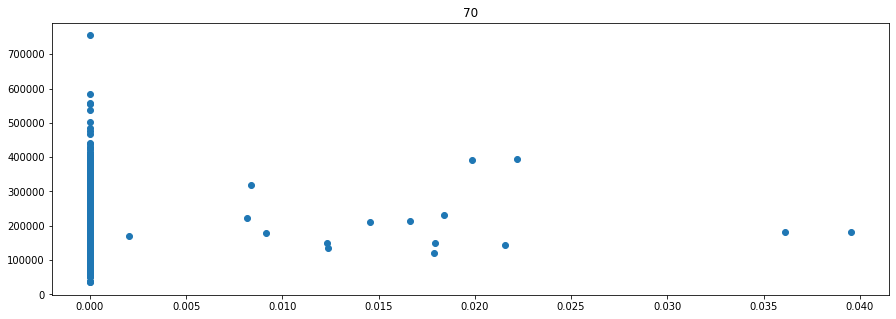

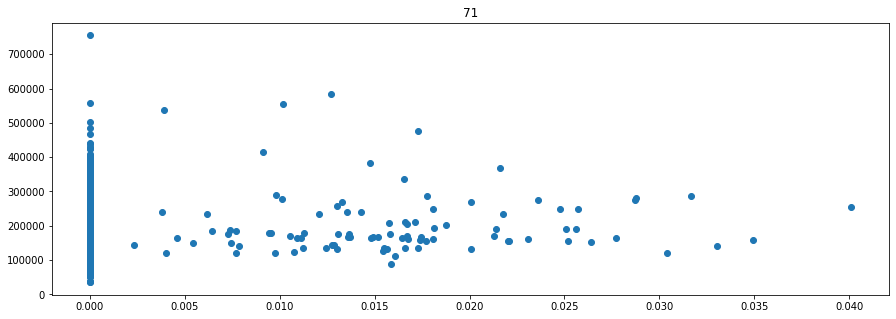

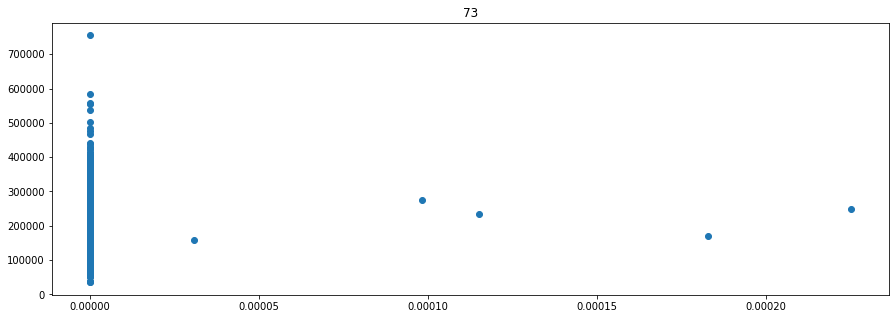

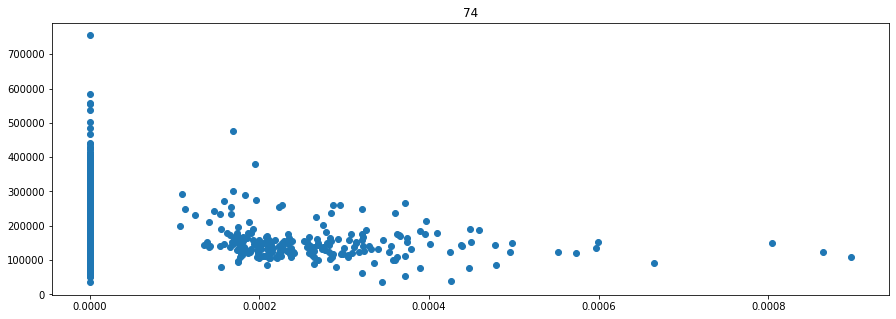

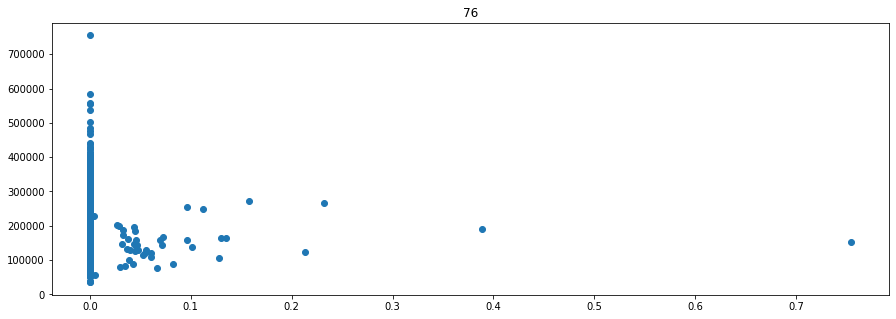

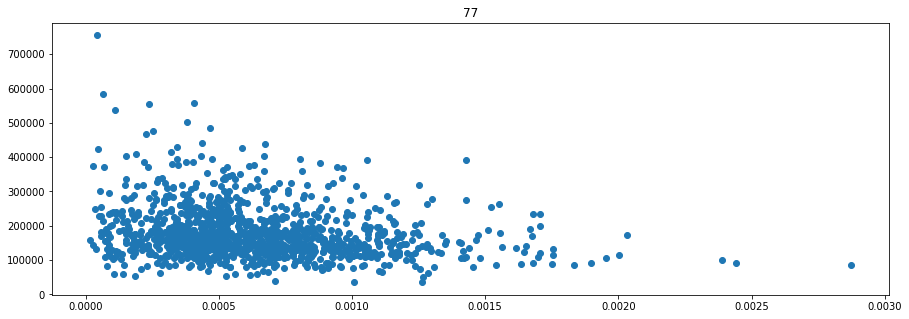

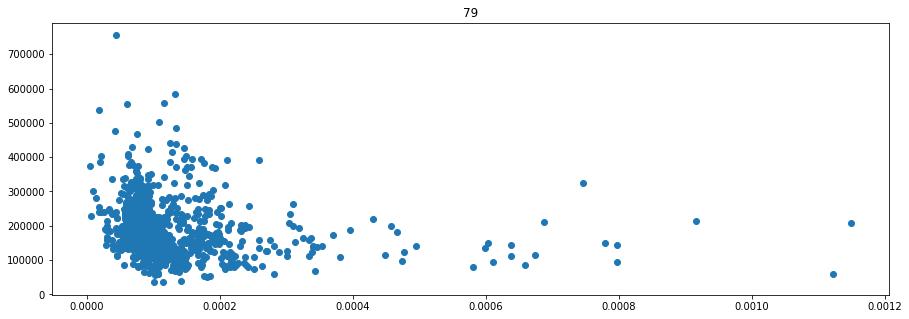

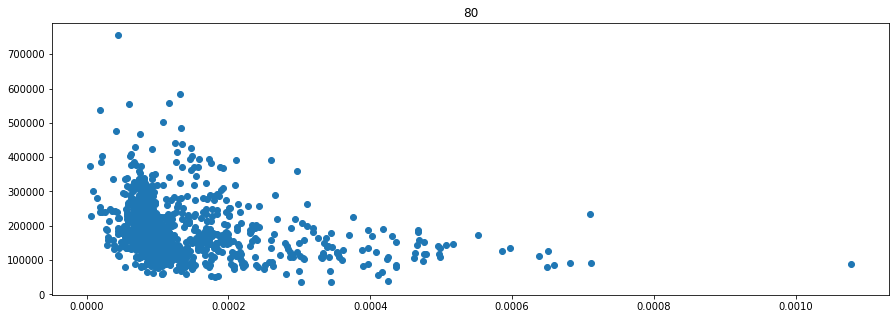

In [27]:
i = 0
for x in X_train.T:
    try:
        i += 1
        plt.figure(figsize = (15, 5))
        plt.title(i)
        plt.scatter(x, Y_train)
    except:
        pass

In [50]:
X

NameError: name 'X' is not defined